In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time,random;

In [2]:
def draw_violin_single_plot_hue(df, kernel_name, hue_="repetitions_inside"):
    # Filter for the kernel
    df_k = df[df["kernel"] == kernel_name]
    plt.figure(figsize=(8, 6))

    sns.violinplot(
        data=df_k,
        x="compute_per_run",   # your time variable
        hue=hue_,        # different color per repetitions_inside
        inner="point",         # show individual points
    )

    plt.ylabel("")
    plt.title(f"Comparing repetitions of kernel {kernel_name}")
    plt.xlabel("Execution time of one kernel (ms)")
    plt.savefig(f"./figs/{kernel_name}-{int(time.time()*1000)}_{random.randint(0,9999)}.svg", format="svg", bbox_inches="tight")

    plt.show()
    

In [3]:
def draw_violin(df,kernel_name,comparing_with_above=0.5,rep_="repetitions_inside"):
    df_k = df[df["kernel"] == kernel_name]


    reps_order = sorted(df_k[rep_].unique())
    nb_echantillons = sorted(df_k["repetitions_outside"].unique())[0]

    g = sns.FacetGrid(df_k, col=rep_, col_order=reps_order,
                    margin_titles=True, height=4, sharex=False, sharey=True)

    g.map(sns.violinplot, "compute_per_run",
        inner="point", color="tab:blue")

    g.set_axis_labels("Temps par exécution", "")
    for ax in g.axes.flatten():
        if comparing_with_above != False:
            df_k_sup_1 = df_k[df_k[rep_] > 0]
            x_min, x_max = df_k_sup_1["compute_per_run"].min(), df_k_sup_1["compute_per_run"].max()
            ax.set_xlim(x_min,x_max)
        ax.set_xlabel("")           # optional: remove x-label per facet
        ax.set_ylabel("Temps par exécution")

    plt.subplots_adjust(top=0.8)
    g.figure.suptitle(f"Distribution du temps par exécution – Kernel: {kernel_name} - {nb_echantillons} Echantillons")
    plt.savefig(f"./figs/{kernel_name}-{int(time.time()*1000)}_{random.randint(0,9999)}.svg", format="svg", bbox_inches="tight")
    plt.show()

In [4]:
inside_csv = "../src/build/csv/benchmarking_inside.csv"
df_inside = pd.read_csv(inside_csv)
df_reference_inside = df_inside[df_inside['version'].str.contains("Reference")]
df_reference_inside['compute_per_run'] = df_reference_inside['compute'] / df_reference_inside['repetitions_inside']

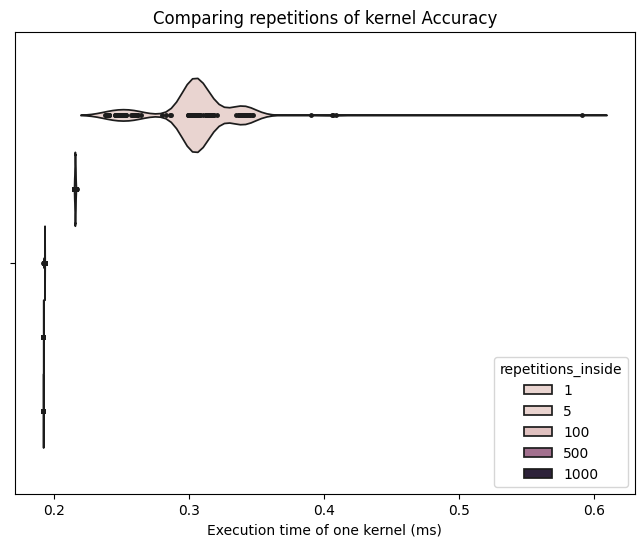

/home/ecomeyr/research/gpubuggybenchmark/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


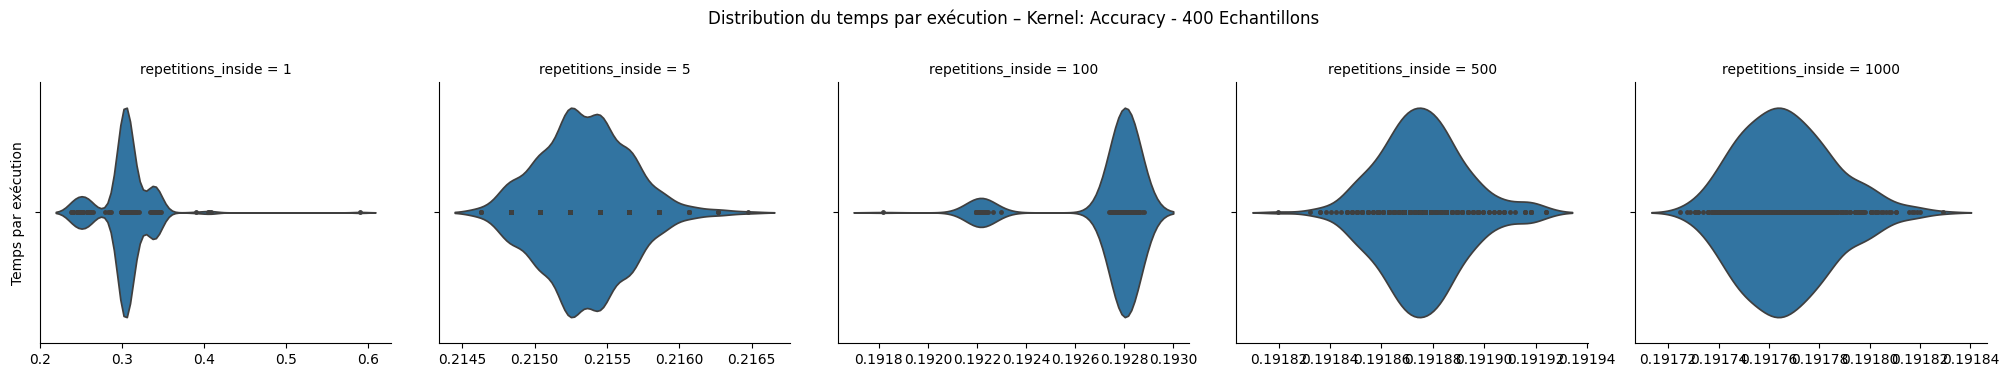

In [5]:
draw_violin_single_plot_hue(df_reference_inside,"Accuracy")
draw_violin(df_reference_inside,"Accuracy",False)

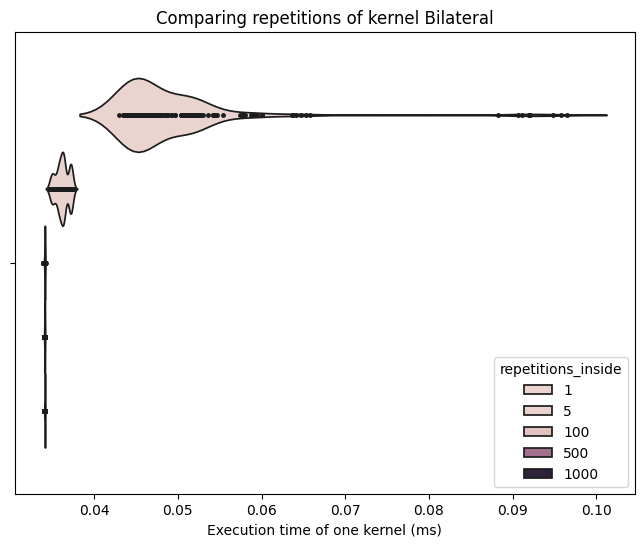

/home/ecomeyr/research/gpubuggybenchmark/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


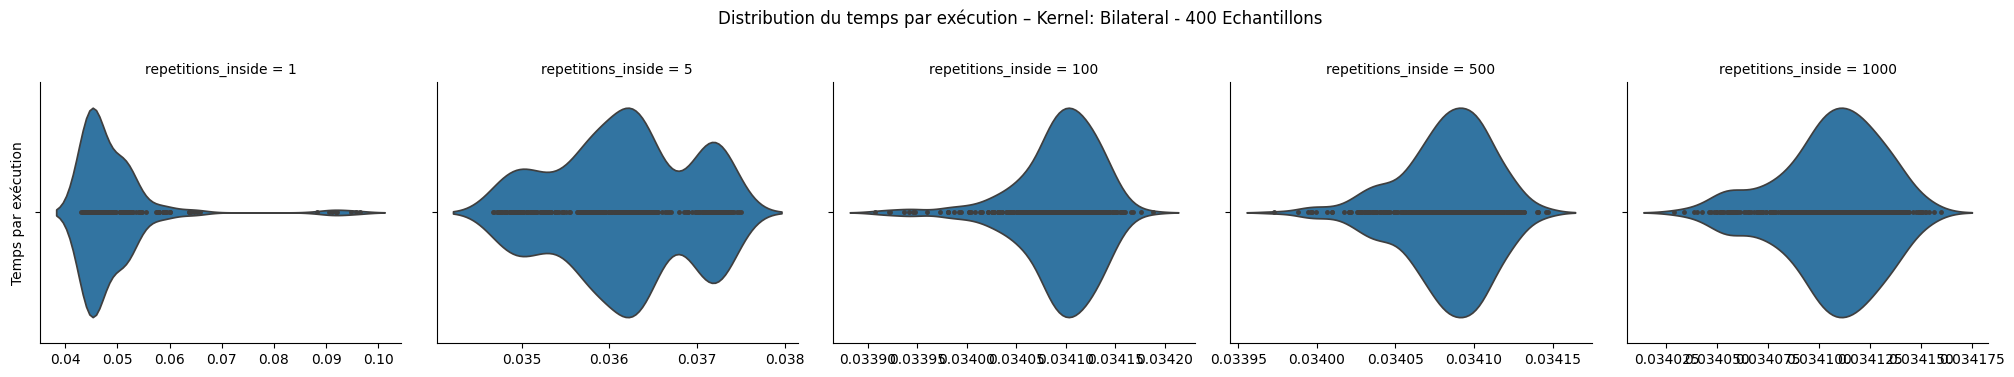

In [6]:
draw_violin_single_plot_hue(df_reference_inside,"Bilateral")
draw_violin(df_reference_inside,"Bilateral",False)

In [7]:
outside_csv = "../src/build/csv/benchmarking_outside.csv"
df_outside = pd.read_csv(outside_csv)
df_reference_outside = df_outside[df_outside['version'].str.contains("Reference")]
df_reference_outside['compute_per_run'] = df_reference_outside['compute'] / df_reference_outside['repetitions_inside']

In [8]:
df_reference_outside

,memcpy2D,memcpy2H,compute,repetitions_inside,repetitions_outside,kernel,version,compute_per_run
0,0.286336,0.015456,116.636642,500,25,Accuracy,ReferenceAccuracy,0.233273
1,0.266304,0.015936,102.036484,500,25,Accuracy,ReferenceAccuracy,0.204073
2,0.256096,0.015520,97.912834,500,25,Accuracy,ReferenceAccuracy,0.195826
3,0.263552,0.014048,95.967232,500,25,Accuracy,ReferenceAccuracy,0.191934
4,0.260512,0.014784,95.959038,500,25,Accuracy,ReferenceAccuracy,0.191918
...,...,...,...,...,...,...,...,...
11187,0.042368,0.042368,17.016352,500,756,Bilateral,ReferenceBilateral,0.034033
11188,0.042368,0.040864,17.004192,500,756,Bilateral,ReferenceBilateral,0.034008
11189,0.042112,0.040320,16.985632,500,756,Bilateral,ReferenceBilateral,0.033971
11190,0.043072,0.042880,16.980385,500,756,Bilateral,ReferenceBilateral,0.033961


/home/ecomeyr/research/gpubuggybenchmark/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


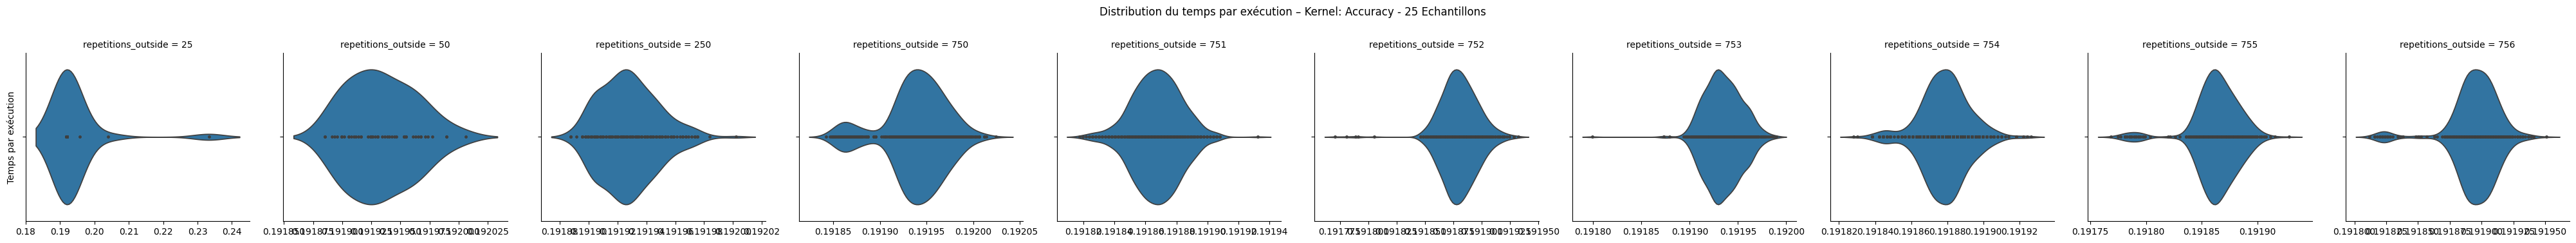

In [9]:
draw_violin(df_reference_outside,"Accuracy",False,"repetitions_outside")

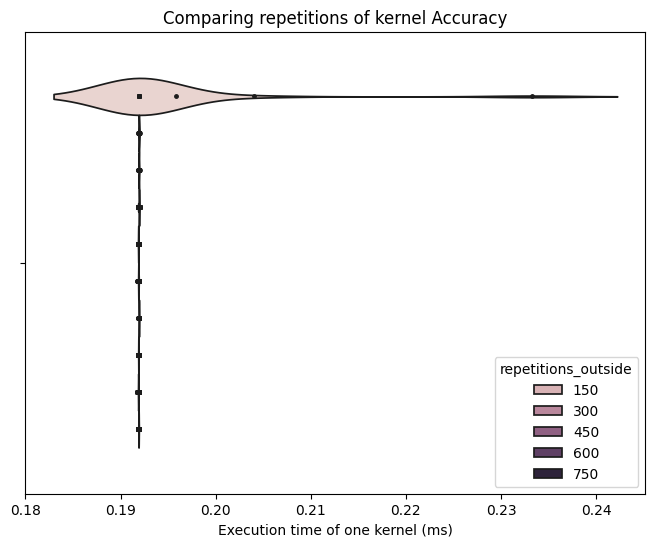

In [10]:
df_temp = df_reference_outside[df_reference_outside["repetitions_outside"]>10]
draw_violin_single_plot_hue(df_temp,"Accuracy","repetitions_outside")

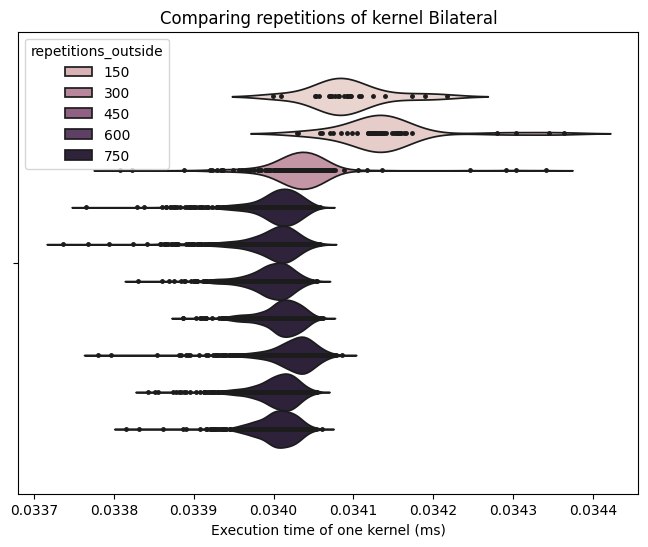

In [11]:
draw_violin_single_plot_hue(df_reference_outside,"Bilateral","repetitions_outside")

In [ ]:
def draw_violin_single_plot_bugs(df, kernel_name):
    # Filter for the kernel
    df_k = df[df["kernel"] == kernel_name]
    plt.figure(figsize=(8, 6))

    sns.violinplot(
        data=df_k,
        x="compute_per_run",   # your time variable
        y="version",
        hue="version",     
        inner="point",         # show individual points
    )

    plt.ylabel("Versions")
    plt.title(f"Comparing execution times of kernel {kernel_name} with bugs")
    plt.xlabel("Execution time of one kernel (ms)")
    plt.savefig(f"./figs/{kernel_name}-{int(time.time()*1000)}_{random.randint(0,9999)}.svg", format="svg", bbox_inches="tight")

    plt.show()
    

In [16]:
bugs_csv = "../src/build/csv/comparing_bugs.csv"
df_bugs = pd.read_csv(bugs_csv)
df_bugs['compute_per_run'] = df_bugs['compute'] / df_bugs['repetitions_inside']

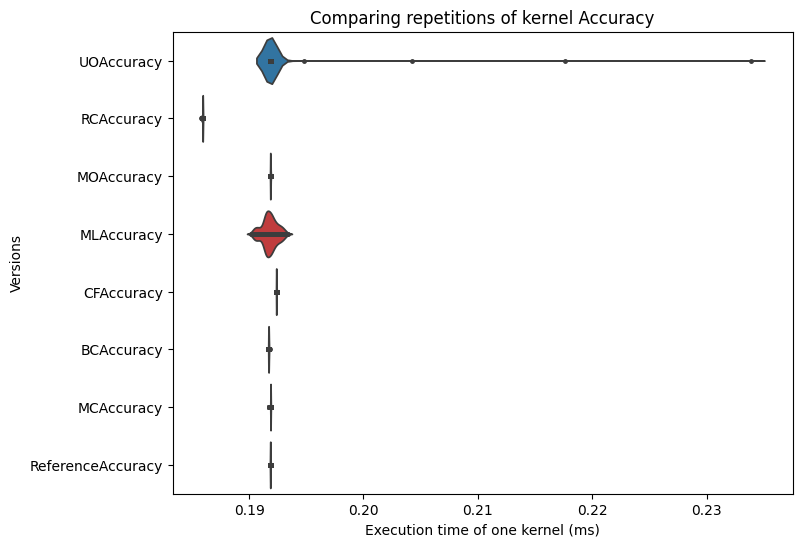

In [18]:
draw_violin_single_plot_bugs(df_bugs,"Accuracy")